In [56]:
### Extract files from the zip files

import os
import zipfile
import shutil

files_folder = 'Data_zipped' # Folder containing all the .zip files

# Remove the existing /Data folder and create a new one
if os.path.exists('Data'):
    shutil.rmtree('Data')
os.makedirs('Data', exist_ok=True)

# Unzip all .zip files in /Data_zipped into /Data
for foldername, subfolders, filenames in os.walk(files_folder):
    for filename in filenames:
        if filename.endswith('.zip'):
            zip_file = zipfile.ZipFile(os.path.join(foldername, filename))
            # Extract only the "Output" in that .zip file
            run_name = filename.split('_')[0].split('Run')[1]
            zip_file.extractall(f'Data/{run_name}')
            zip_file.close()
            print(f'{filename} unzipped to /Data/{run_name}')
print('All .zip files unzipped to /Data')


Run0_Outputs.zip unzipped to /Data/0
Run1_Outputs.zip unzipped to /Data/1
Run2_Outputs.zip unzipped to /Data/2
Run3_Outputs.zip unzipped to /Data/3
Run4_Outputs.zip unzipped to /Data/4
Run5_Outputs.zip unzipped to /Data/5
All .zip files unzipped to /Data


In [ ]:
### Extract the data into a python dictionary

run_name = 3
path_gan_cell_resp = f'Data/{run_name}/Outputs/Responses/Gan_Cell_Responses'
t_csv = f'Data/{run_name}/Outputs/Responses/t.csv'

# Load the t.csv file into an numpy array
import numpy as np
t = np.loadtxt(t_csv, delimiter=',')

# Load the GAN cell responses into a numpy array
# List all files in path_gan_cell_resp
import os
gan_cell_files = os.listdir(path_gan_cell_resp)
gan_cell_files.sort()
gan_cell_odd_coord = []
gan_cell_even_coord = []
for file in gan_cell_files:
    if file.endswith('.csv'):
        # if file name has "even"
        if 'even' in file:
            coord = file.split('_')[1].split('even')[1].split('.')[0]
            gan_cell_even_coord.append(coord)
        else:
            coord = file.split('_')[1].split('odd')[1].split('.')[0]
            gan_cell_odd_coord.append(coord)

# Load the GAN cell responses into a numpy array
gan_cell_odd_resp = {}
gan_cell_even_resp = {}
for coord in gan_cell_odd_coord:
    if os.path.getsize(f'{path_gan_cell_resp}/Gan_Cellodd{coord}.csv') == 0:
        gan_cell_odd_coord.remove(coord)
        print (f'odd{coord} is empty, removing from list')
    else:
        gan_cell_odd_resp[coord] = np.loadtxt(f'{path_gan_cell_resp}/Gan_Cellodd{coord}.csv', delimiter=',')
for coord in gan_cell_even_coord:
    if os.path.getsize(f'{path_gan_cell_resp}/Gan_Celleven{coord}.csv') == 0:
        gan_cell_even_coord.remove(coord)
        print (f'even{coord} is empty, removing from list')
    else:
        gan_cell_even_resp[coord] = np.loadtxt(f'{path_gan_cell_resp}/Gan_Celleven{coord}.csv', delimiter=',')

odd04 is empty, removing from list
odd14 is empty, removing from list
odd24 is empty, removing from list
odd34 is empty, removing from list
odd41 is empty, removing from list
odd43 is empty, removing from list
even03 is empty, removing from list
even13 is empty, removing from list
even23 is empty, removing from list
even33 is empty, removing from list
even43 is empty, removing from list
even51 is empty, removing from list
even53 is empty, removing from list


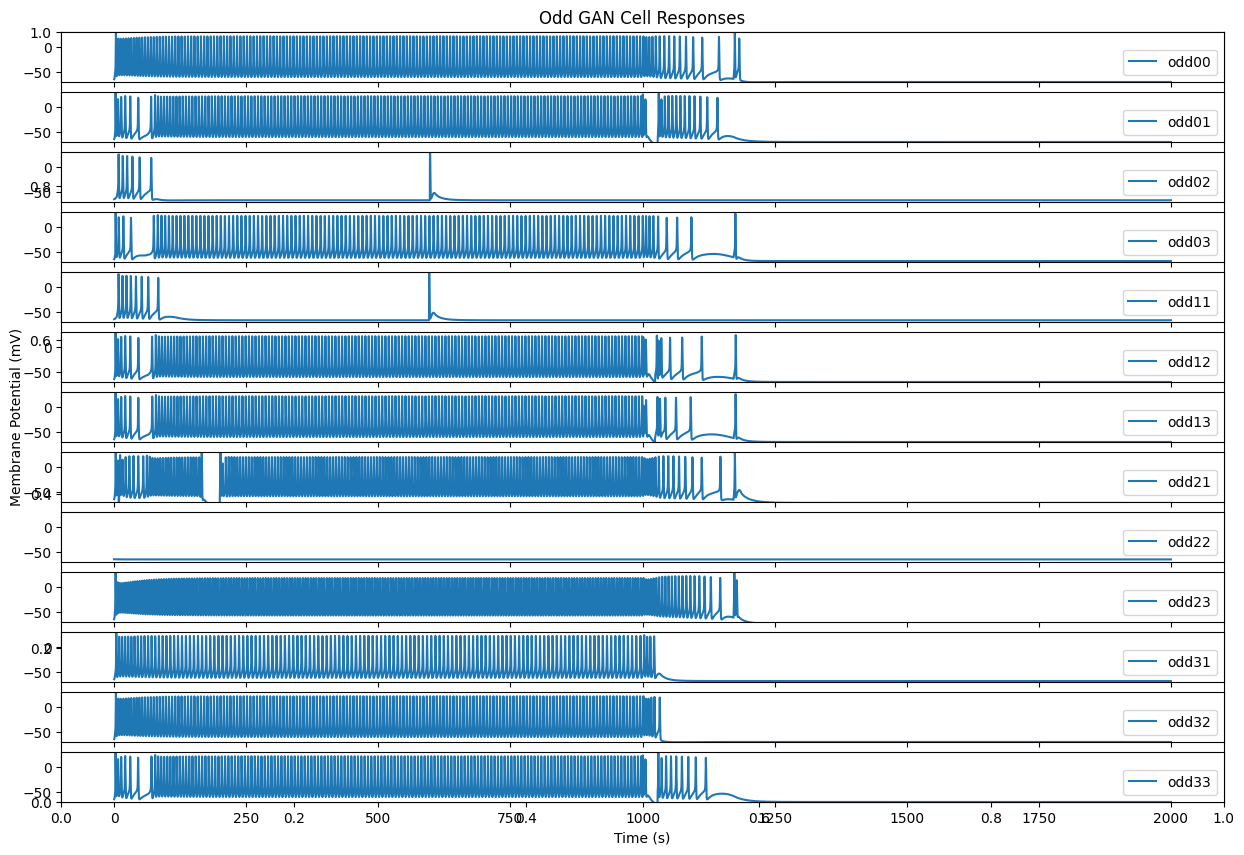

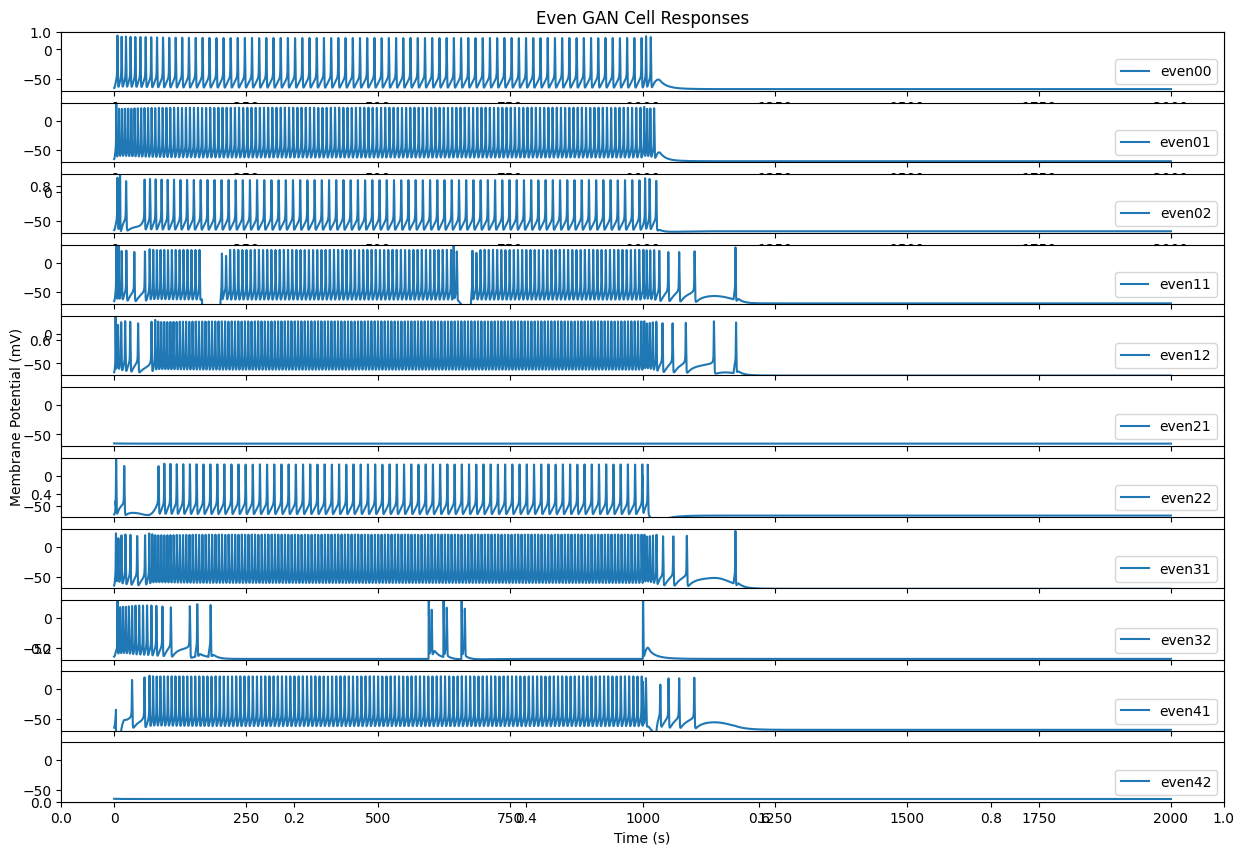

In [ ]:
### Plot all the GAN cell responses

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
N_plot = len(gan_cell_odd_resp.keys())

plt.title('Odd GAN Cell Responses')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
# Index using keys
for coord_i in range(N_plot):
    coord = list(gan_cell_odd_resp.keys())[coord_i]
    plt.subplot(N_plot, 1, int(coord_i)+1)
    plt.plot(t, gan_cell_odd_resp[coord], label=f'odd{coord}')
    plt.ylim([-70,30])
    # Put legend on the bottom right 
    plt.legend(loc='lower right')

# Do the same for Even GAN Cell Responses
plt.figure(figsize=(15, 10))
N_plot = len(gan_cell_even_resp.keys())

plt.title('Even GAN Cell Responses')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
# Index using keys
for coord_i in range(N_plot):
    coord = list(gan_cell_even_resp.keys())[coord_i]
    plt.subplot(N_plot, 1, int(coord_i)+1)
    plt.plot(t, gan_cell_even_resp[coord], label=f'even{coord}')
    plt.ylim([-70,30])
    # Put legend on the bottom right 
    plt.legend(loc='lower right')

